In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier


In [2]:
#Load dataset. This data is was downloaded from basketball reference.com
df = pd.read_csv('/Users/nmsievers/Desktop/celtics_nba.csv')
df

,Rk,G,Date,home_away,Opp,W/L,celtics_points,opp_points,c_FG,c_FGA,...,o_FT,o_FTA,o_FT%,o_ORB,o_TRB,o_AST,o_STL,o_BLK,o_TOV,o_PF
0,1,1,10/20/21,@,NYK,L,134,138,48,117,...,19,27,0.704,7,55,27,9,10,17,22
1,2,2,10/22/21,NaN,TOR,L,83,115,32,82,...,21,21,1.000,21,60,22,16,2,11,13
2,3,3,10/24/21,@,HOU,W,107,97,38,86,...,19,24,0.792,5,40,20,7,4,18,20
3,4,4,10/25/21,@,CHO,W,140,129,50,101,...,18,28,0.643,14,52,26,4,6,14,25
4,5,5,10/27/21,NaN,WAS,L,107,116,37,85,...,21,29,0.724,11,47,18,8,7,15,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,75,3/27/22,NaN,MIN,W,134,112,49,87,...,8,12,0.667,4,30,26,7,3,14,21
75,76,76,3/28/22,@,TOR,L,112,115,39,95,...,13,18,0.722,16,52,16,10,11,10,28
76,77,77,3/30/22,NaN,MIA,L,98,106,35,85,...,17,25,0.680,4,42,27,9,6,15,23
77,78,78,4/1/22,NaN,IND,W,128,123,45,83,...,22,23,0.957,8,30,25,9,3,16,30


In [3]:
#No null data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rk              79 non-null     int64  
 1   G               79 non-null     int64  
 2   Date            79 non-null     object 
 3   home_away       38 non-null     object 
 4   Opp             79 non-null     object 
 5   W/L             79 non-null     object 
 6   celtics_points  79 non-null     int64  
 7   opp_points      79 non-null     int64  
 8   c_FG            79 non-null     int64  
 9   c_FGA           79 non-null     int64  
 10  c_FG%           79 non-null     float64
 11  c_3P            79 non-null     int64  
 12  c_3PA           79 non-null     int64  
 13  c_3P%           79 non-null     float64
 14  c_FT            79 non-null     int64  
 15  c_FTA           79 non-null     int64  
 16  c_FT%           79 non-null     float64
 17  c_ORB           79 non-null     int64

In [5]:
#Make all columns lowercase
df.columns = df.columns.str.lower()
df.head()

,rk,g,date,home_away,opp,w/l,celtics_points,opp_points,c_fg,c_fga,...,o_ft,o_fta,o_ft%,o_orb,o_trb,o_ast,o_stl,o_blk,o_tov,o_pf
0,1,1,10/20/21,@,NYK,L,134,138,48,117,...,19,27,0.704,7,55,27,9,10,17,22
1,2,2,10/22/21,NaN,TOR,L,83,115,32,82,...,21,21,1.000,21,60,22,16,2,11,13
2,3,3,10/24/21,@,HOU,W,107,97,38,86,...,19,24,0.792,5,40,20,7,4,18,20
3,4,4,10/25/21,@,CHO,W,140,129,50,101,...,18,28,0.643,14,52,26,4,6,14,25
4,5,5,10/27/21,NaN,WAS,L,107,116,37,85,...,21,29,0.724,11,47,18,8,7,15,20


In [6]:
#Drop redundant rk column 
df = df.drop(columns='rk')

In [7]:
#Make new column to specify if a game is home or away
df['home_away'] = np.where(df['home_away'].isin(['@']), 0, 1)

In [8]:
#Make date column into date dtype
df['date'] = pd.to_datetime(df['date'])

In [9]:
#Make win loss a 1 or 0 
df['w/l'] = np.where(df['w/l'].isin(['W']), 1, 0)

In [11]:
#Exploratory Analysis 

In [12]:
#Celtics record this season
df['w/l'].value_counts()

1    49
0    30
Name: w/l, dtype: int64

In [13]:
#Celtics won 62% of their games this season. The model should be able to guess predict better than 62%.
df['w/l'].value_counts(normalize=True)

1    0.620253
0    0.379747
Name: w/l, dtype: float64

In [14]:
df_win_loss = df.groupby('opp').agg(wins=('w/l',np.sum),games=('g',np.size)).reset_index() 
df_win_loss['loss'] = df_win_loss['games'] - df_win_loss['wins']
df_win_loss

,opp,wins,games,loss
0,ATL,2,4,2
1,BRK,3,4,1
2,CHI,1,2,1
3,CHO,3,4,1
4,CLE,2,3,1
5,DAL,0,2,2
6,DEN,2,2,0
7,DET,3,4,1
8,GSW,1,2,1
9,HOU,2,2,0


In [15]:
#Look at Offensive stats compared to opponents 
df[['c_fg%','o_fg%','c_3p%','o_3p%','c_ft%','o_ft%','c_ast','o_ast','c_orb','o_orb']].mean()

#Celtics are shooting better, assisting more, and getting more offensive rebounds than opponents

c_fg%     0.465481
o_fg%     0.435051
c_3p%     0.349949
o_3p%     0.338810
c_ft%     0.817456
o_ft%     0.786063
c_ast    24.594937
o_ast    21.518987
c_orb    10.544304
o_orb    10.354430
dtype: float64

In [16]:
#Look at defensive stats compared to opponents 

df[['c_stl','o_stl','c_blk','o_blk','c_tov','o_tov']].mean()

#Averaging less steals, more blocks, and the same number of turnovers as opponents

c_stl     7.177215
o_stl     7.430380
c_blk     5.898734
o_blk     4.569620
c_tov    13.012658
o_tov    13.000000
dtype: float64

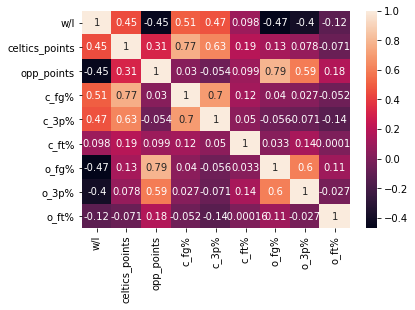

In [20]:
df_offense_corr = df[['opp','w/l','celtics_points','opp_points','c_fg%','c_3p%','c_ft%','o_fg%','o_3p%','o_ft%',]]
sns.heatmap(df_offense_corr.corr(), annot = True)

#Features with the highest correlation to w/l
# c_fg% -> c_3p% -> o_fg% -> opp_points -> celtics_points -> o_3p%
#ft% doesnt not correlation much with winning 

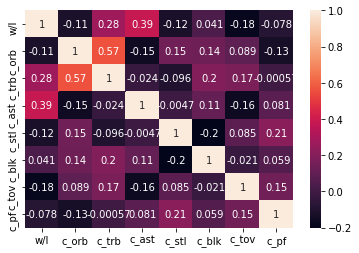

In [21]:
df_defense_corr_celtics = df[['w/l','c_orb', 'c_trb', 'c_ast', 'c_stl', 'c_blk', 'c_tov', 'c_pf']]
df_defense_corr_opp = df[['w/l','o_orb', 'o_trb', 'o_ast', 'o_stl', 'o_blk', 'o_tov', 'o_pf']]
sns.heatmap(df_defense_corr_celtics.corr(), annot = True);

#celtics assists and rebound percent have large impact on win/loss

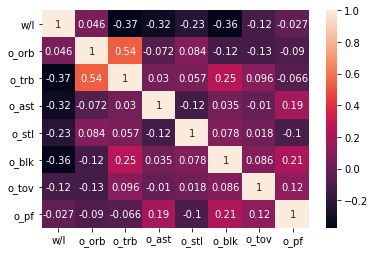

In [22]:
sns.heatmap(df_defense_corr_opp.corr(), annot = True);
#Opponent rebound, assists, blocks and steals have high correlations 

In [24]:
#One df with home/away, opp and one without. 
df_nn_simple = df[['home_away','opp','celtics_points','opp_points','c_fg%','c_3p%','o_fg%','o_3p%','c_ast','c_trb','o_trb','o_ast','o_blk','o_stl']]
df_combined = df[['home_away','opp','c_fg%','c_3p%','celtics_points','c_ast','c_trb']]
df_combined_en = pd.get_dummies(df_combined, drop_first=True)
df_nn_all = pd.get_dummies(df_nn_simple, drop_first=True)



In [25]:
df_combined_en.head()

,home_away,c_fg%,c_3p%,celtics_points,c_ast,c_trb,opp_BRK,opp_CHI,opp_CHO,opp_CLE,...,opp_OKC,opp_ORL,opp_PHI,opp_PHO,opp_POR,opp_SAC,opp_SAS,opp_TOR,opp_UTA,opp_WAS
0,0,0.410,0.368,134,34,56,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.390,0.324,83,19,42,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0.442,0.319,107,22,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.495,0.380,140,33,53,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.435,0.345,107,18,37,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [28]:
#Create a nueral net to try and predict win or loss

#train test split 
X_all = df_nn_all
y_all = df['w/l']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all)

In [126]:
#Knn
knn_clas = KNeighborsClassifier()

X_knn = df_combined_en
y_knn = df['w/l']


X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn)

In [52]:
#instantiate and fit model
knn_n_rows = KNeighborsClassifier(n_neighbors=len(y_train_knn)).fit(X_train_knn, y_train_knn)
knn_n_rows.score(X_test_knn, y_test_knn)

#55% of the time the model predicts correctly

0.55

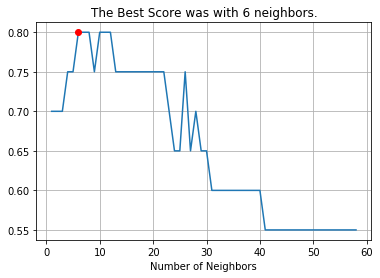

In [63]:
#Find the best number of neighbors 
# A:
scores = []
for i in range(1, len(y_train_knn)):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train_knn, y_train_knn)
    scores.append(knn.score(X_test_knn, y_test_knn))
    
plt.plot(range(1, len(y_train_knn)), scores)
plt.xlabel('Number of Neighbors')
plt.plot(np.argmax(scores) + 1, max(scores), 'ro')
plt.title(f'The Best Score was with {np.argmax(scores) + 1} neighbors.')
plt.grid()
#6 is the ideal number of neighbors

In [65]:
knn_n_six = KNeighborsClassifier(n_neighbors=6).fit(X_train_knn, y_train_knn)
knn_n_six.score(X_test_knn, y_test_knn)
#Model is now 80% accurate 

0.8

In [66]:
pd.DataFrame({'model': knn_n_six.predict(X_test_knn), 'actual': y_test_knn})

,model,actual
74,1,1
15,1,1
72,1,1
59,0,0
0,1,0
24,0,0
58,1,1
49,0,0
26,0,0
9,0,0


In [71]:
cross_val = cross_val_score(knn_n_six, X_train_knn, y_train_knn)
cross_val.mean()
#mean cross val score of 78%

0.7833333333333333

In [72]:
#Model better scaled? 
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_test_scaled_knn = scaler.transform(X_test_knn)

In [78]:
knn_scaled = KNeighborsClassifier(n_neighbors=6).fit(X_train_scaled_knn, y_train_knn)
knn_scaled.score(X_test_scaled_knn, y_test_knn)

0.75

In [166]:
y_predict_knn = voter.predict(X_test_knn)
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_prediction))
#test data accuracy 

Accuracy: 0.55


In [81]:
cross_val_score(knn_scaled, X_train_scaled_knn, y_train_knn).mean()

0.6621212121212121

In [93]:
#Logistical Regression 
X_lgr = df_combined_en
y_lgr = df['w/l']


X_train_lgr, X_test_lgr, y_train_lgr, y_test_lgr = train_test_split(X_lgr, y_lgr,test_size=.50)

scaler = StandardScaler()
X_train_scaled_lgr = scaler.fit_transform(X_train_lgr)
X_test_scaled_lgr = scaler.transform(X_test_lgr)

lgr = LogisticRegression()
lgr.fit(X_test_scaled_lgr, y_test_lgr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
lgr.score(X_train_scaled_lgr, y_train_lgr)
#70% accuracy

0.6923076923076923

In [95]:
lgr.score(X_test_scaled_lgr, y_test_lgr)
#Good on test data

0.975

In [97]:
cross_val_score(lgr, X_train_scaled_lgr, y_train_lgr)


array([0.875     , 0.5       , 0.875     , 0.75      , 0.57142857])

In [98]:
cross_val_lgr = cross_val_score(knn_n_six, X_train_knn, y_train_knn)
cross_val_lgr.mean()
#average cross val of 78%

0.7833333333333333

In [243]:
#Decision Tree

X_t = df_combined_en
y_t = df['w/l']


X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_t, y_t)

scaler = StandardScaler()
X_train_scaled_t = scaler.fit_transform(X_train_t)
X_test_scaled_t = scaler.transform(X_test_t)

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3)
tree = dtc.fit(X_train_scaled_t,y_train_t)

In [244]:
y_pred = dtc.predict(X_test_scaled_t)
print("Accuracy:",metrics.accuracy_score(y_test_t, y_pred))
#80% accuracy -- better than knn

Accuracy: 0.7


In [245]:
cross_val_score(tree, X_train_scaled_t, y_train_t).mean()
#mean cross val scoe 78%

0.7984848484848486

In [203]:
#Random Forst and ExtrTree classifiers

forest = RandomForestClassifier(criterion='entropy', max_depth=3)
extra = ExtraTreesClassifier(criterion='entropy', max_depth=3)

forest.fit(X_train_scaled_t, y_train_t)
extra.fit(X_train_scaled_t, y_train_t)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='entropy', max_depth=3, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [220]:
cross_val_score(forest, X_train_scaled_t, y_train_t).mean() #about same as decision tree

0.7287878787878789

In [221]:
cross_val_score(extra, X_train_scaled_t, y_train_t).mean() #about same as decision tree

0.6439393939393938